In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# 1a)

Text(0.5, 1.0, 'T(α)')

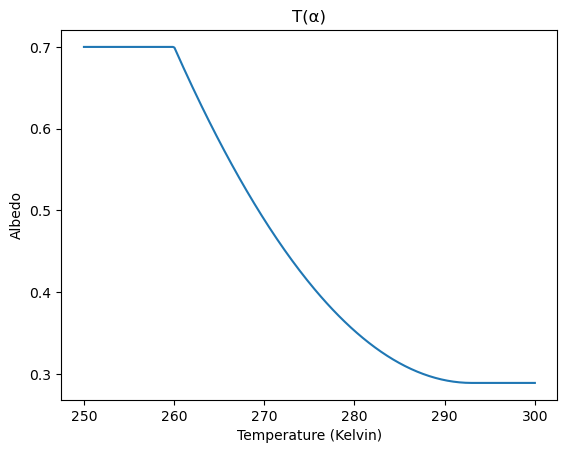

In [53]:
t0 = 293 #K
ti = 260 #K
alp0 = .289
alpi = .7

#albedo function
def get_alb(t):
    if t <= ti:
        return alpi
    elif t > ti and t < t0:
        alp = alp0 + (alpi - alp0) * (((t - t0)**2) / ((ti-t0)**2))
        return alp
    elif t >= ti:
        return alp0


#get albedo values for T from 250 to 300        
temp = np.linspace(250,300,300)
vec_alb = np.vectorize(get_alb)
albedo = vec_alb(temp)

#Plot
plt.plot(temp, albedo)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Albedo')
plt.title('T(\u03B1)')

# 1b)

In [105]:
solarconstant = 1366
stefanboltzman = 5.670374419e-8
heatcapacity = 4.0e8 #J/m2/K8 #J/m2/K
epsilon = 0.78

u = np.zeros((M,))

M = 2 
#u[0] is Ta
#u[1] is Ts

def myfun( t, u): 
    f = np.zeros((M,))
    albedo = get_alb(u[1])
    
    f[0] = (solarconstant * (1-albedo)/4 - epsilon*stefanboltzman*(u[0]**4) 
            - (1-epsilon)*stefanboltzman*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-albedo)/4 + epsilon*stefanboltzman*(u[0]**4) - 
            stefanboltzman*(u[1]**4))/heatcapacity
    return f

In [106]:
# initial conditions
u0 = np.zeros((M))
u0 = [290,300]
#u0 = np.linspace(0, 293, M)  # Start from 0 K and gradually approach 293 K

Dt = 60*60*365*24
t0 = 0
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)
N = np.shape(t)[0]

In [107]:
sol1 = solve_ivp(myfun, [t0, tmax], u0, method='RK45', t_eval=t)
epsilon = 0.8
sol2 = solve_ivp(myfun, [t0, tmax], u0, method='RK45', t_eval=t)

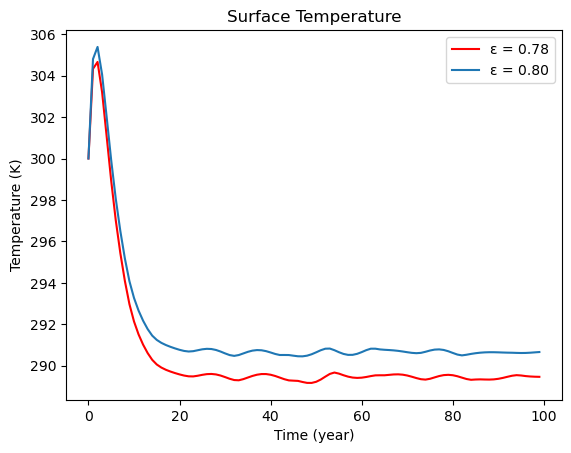

In [108]:
fig = plt.figure()
#plt.plot(sol1.t / (60*60*365*24), sol1.y[0], 'k-', label='atmos T 1')
plt.plot(sol1.t / (60*60*365*24), sol1.y[1], 'r-', label='\u03B5 = 0.78')
#plt.plot(sol2.t / (60*60*365*24), sol2.y[0], label='atmos T 2')
plt.plot(sol2.t / (60*60*365*24), sol2.y[1], label='\u03B5 = 0.80')
plt.title('Surface Temperature')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()

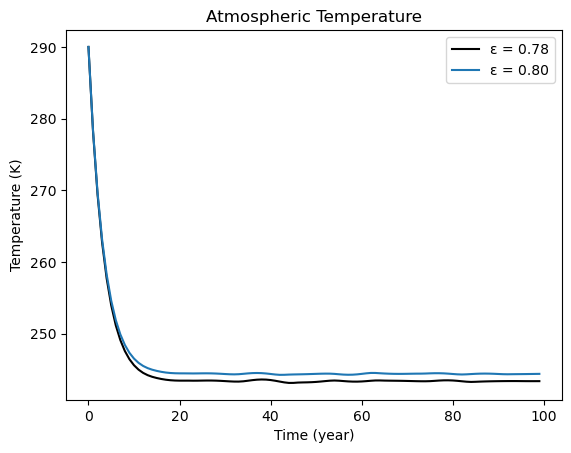

In [109]:
fig = plt.figure()
plt.plot(sol1.t / (60*60*365*24), sol1.y[0], 'k-', label='\u03B5 = 0.78')
plt.plot(sol2.t / (60*60*365*24), sol2.y[0], label='\u03B5 = 0.80')
plt.title('Atmospheric Temperature')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()

#### Using the last numbers in the surface temperature arrays to appproximate the steady state temperatures:

In [112]:
ts1 = sol1.y[1]
ts2 = sol2.y[1]
deltats =  ts2[-1] - ts1[-1]
ts2[-1],ts1[-1], deltats

(290.66126118658946, 289.4647529219455, 1.1965082646439669)

In [115]:
print('The change in temperature as a result of changing \u03B5 from 0.78 to 0.80 is: %0.4f Kelvin'% (deltats))

The change in temperature as a result of changing ε from 0.78 to 0.80 is: 1.1965 Kelvin


*A quick note, there appears to be multiple steady state values for these equations. If I use starting values around from 0 to around 280 Kelvin the temperature stabilizes around 233 degrees Kelvin. If I use the starting values from class or ones that are higher I get the steady state seen above around 290 Kelvin. I tried multiple numeerical solving algorithms to see if that was the issue, and got the same results every time.*